# **SyriaTel Customer Churn Analysis**

## 1.Business Understanding

## 1.1 Project Statement Overview

SyriaTel, a telecommunications company, is dealing with a significant problem of customer churn, where a substantial number of customers are leaving their services for those of competitors. To tackle this challenge, the company seeks to build a predictive model for customer churn. By examining the dataset, SyriaTel aims to understand the factors contributing to customer attrition, with the ultimate objective of lowering the churn rate, enhancing customer retention, and boosting overall profitability.


### 1.2 Specific Objectives

* Identify the key factors contributing to customer churn.
* Create a model that can accurately predict which customers are at risk of leaving.
* Implement strategies to proactively retain customers who are identified as at risk of churn.
 

#### 2. Data Understanding

### Importing necessary libraries

In [57]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import itertools
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, mean_squared_error, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler, scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, auc, confusion_matrix, classification_report, recall_score

from sklearn.tree import DecisionTreeClassifier

Loading the data

In [58]:
df = pd.read_csv("data/bigml_59c28831336c6604c800002a.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [59]:
#Identify the total number of columns and rows
df.shape

(3333, 21)

In [60]:
#Summary of the DataFrame
df.info


<bound method DataFrame.info of      state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                yes     

In [61]:
#column names
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [62]:
# Get a statistical summary of the DataFrame
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## 3. Data Preparation

### 3.1 Data cleaning

In [63]:
#Identify data types for each column
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [64]:
# Convert 'area code' datatype to object
df["area code"] = df["area code"].astype(object)

In [65]:
#Drop the 'phone number' column
df = df.drop('phone number', axis=1, errors='ignore')

In [66]:
#Checking for missing data
df.isnull().sum()

state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are no missing values in our data.

In [67]:
#checking duplicates in the data
duplicated = df.duplicated()
duplicated.sum()

0

We have no duplicates in our data.

### 3.2. Exploratory Data Analysis

##### 3.2.1 Distribution of  "Churn"  Variable

In [68]:
#checking class distribution of our target variable
df["churn"].value_counts()

False    2850
True      483
Name: churn, dtype: int64

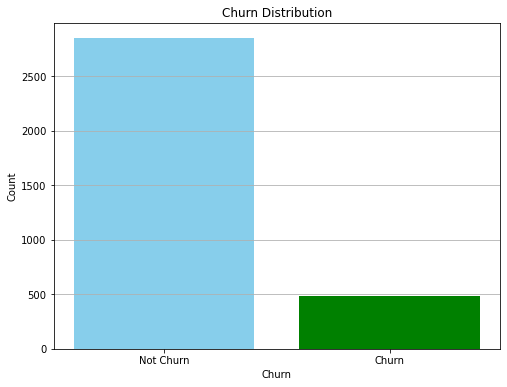

In [69]:
# Count the number of occurrences of each class
class_counts = df['churn'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index.astype(str), class_counts.values, color=['skyblue', 'green'])
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution')
plt.xticks([0, 1], ['Not Churn', 'Churn'])
plt.grid(axis='y')

plt.show()

Out of 3,333 customers in our dataset, 483 have terminated their contract. The distribution of the binary classes shows a data imbalance.This will be addressed before modelling to avoid false predictions.

### 3.2.2 Distribution of the "area code" feature

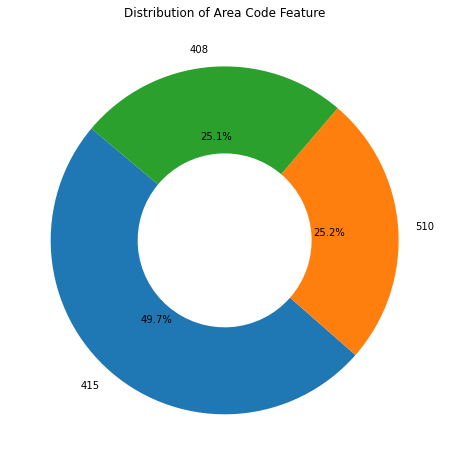

In [70]:
# Count the occurrences of each area code
area_counts = df['area code'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(area_counts, labels=area_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.5))
plt.title('Distribution of Area Code Feature')
plt.show()

Almost half of the customers are in area code 415. A quarter of other customers are in area code 510 and another quarter in area code 408.

##### 3.2.3 Distribution of the numerical features

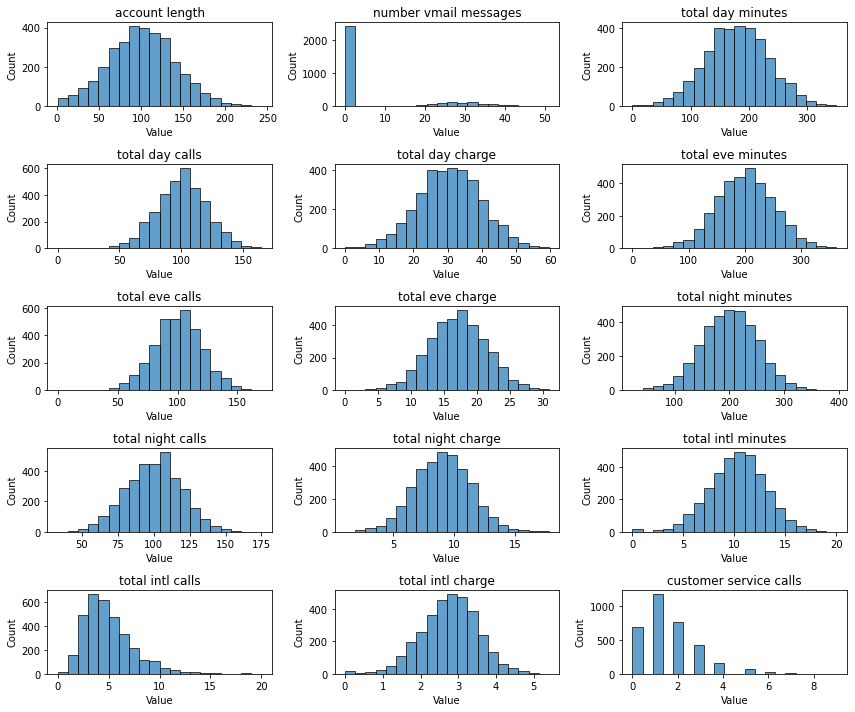

In [71]:
# Numeric features
numeric_features = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge',
                     'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls',
                     'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']

# Create subplots
nrows = (len(numeric_features) - 1) // 3 + 1
ncols = min(3, len(numeric_features))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 10))

# Flatten axes array 
axes = axes.flatten() if nrows > 1 else [axes]

# Plot each feature
for i, feature in enumerate(numeric_features):
    ax = axes[i]
    ax.hist(df[feature], bins=20, edgecolor='black', alpha=0.7)
    ax.set_title(feature)
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')

# Remove any empty subplots
for j in range(len(numeric_features), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
fig.tight_layout()

# Show the plot
plt.show()

Distribution plots above show all numeric features  except customer service calls and number of voicemail messages have a normal distribution.

##### 3.2.4 Distribution of the categorical features

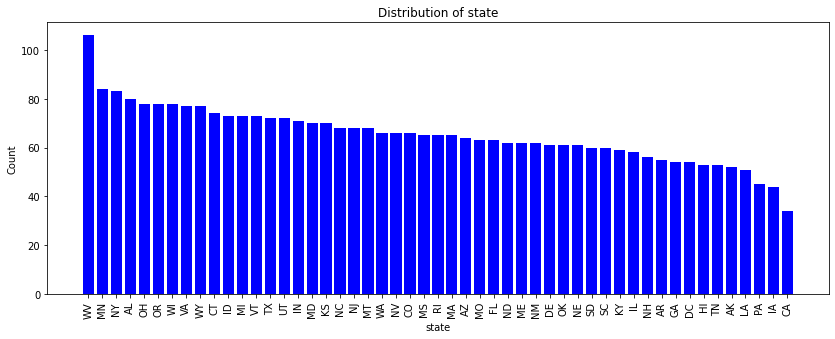

In [72]:
def plot_categorical_distribution(df, feature):
    """
    Plots the distribution of a categorical feature in the given data.
    """
    # Count occurrences of each category
    counts = df[feature].value_counts()

    # Plotting
    plt.figure(figsize=(14, 5))
    plt.bar(counts.index, counts.values, color='blue')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=90)
    plt.show()

# 'state' feature
plot_categorical_distribution(df, 'state')

In [73]:
df['international plan'].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

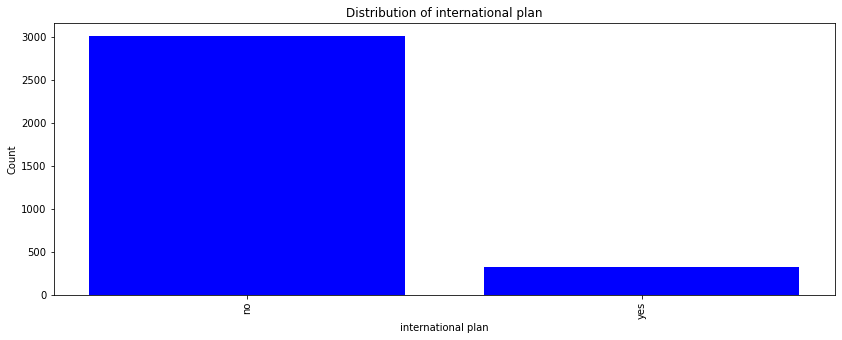

In [74]:
plot_categorical_distribution(df,'international plan')

Only 323 of them have an international plan out of 3333 total customers.

In [75]:
df["voice mail plan"].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

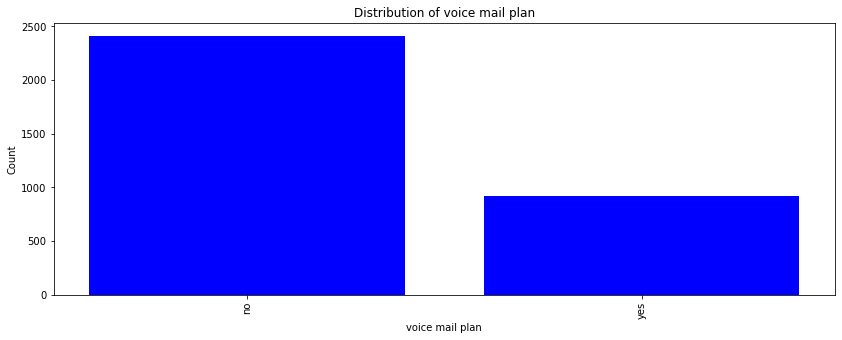

In [76]:
plot_categorical_distribution(df, 'voice mail plan')

Only 922 of them have an voice mail plan out of 3333 total customers.

####  Bivariate Analysis

We are going to explore and evaluate the relationship between two features in the dataset. 

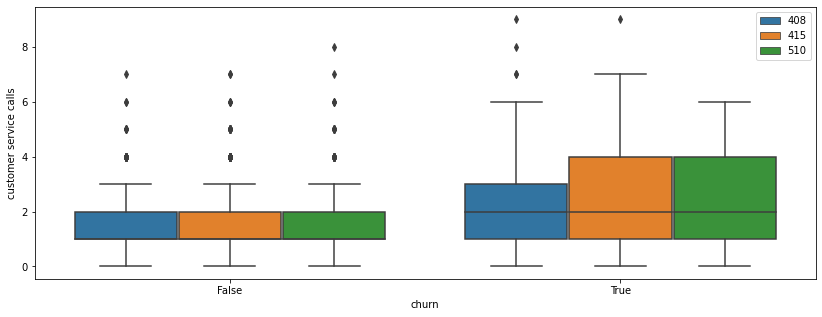

In [77]:
# Area code VS churn 
# Boxplot to see which area code has the highest churn
plt.figure(figsize=(14,5))
sns.boxplot(data=df,x='churn',y='customer service calls',hue='area code');
plt.legend(loc='upper right');

 Area code 510 and 415 had higher numbers of customer service calls and many customers who terminated their accounts.

In [78]:
#Checking the distribution of categorical features based on churn rate
def plot_categorical_distribution(data, feature):
    """
    Plots the distribution of a categorical feature in the given data.
    """
    plt.figure(figsize=(10, 4))
    churn_counts = df.groupby(feature)["churn"].sum().sort_values(ascending=False)
    top_10_categories = churn_counts.head(10).index.tolist()
    sns.countplot(x=feature, hue="churn", data=df, order=top_10_categories)
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.show()

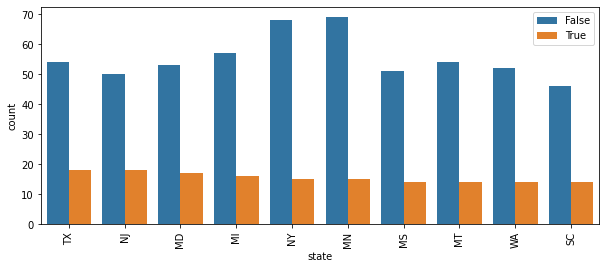

In [79]:
plot_categorical_distribution(df, 'state')

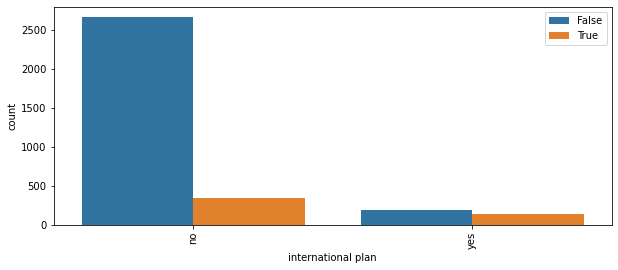

In [80]:
plot_categorical_distribution(df, 'international plan')

The majority of customers who churned did not have an international plan.

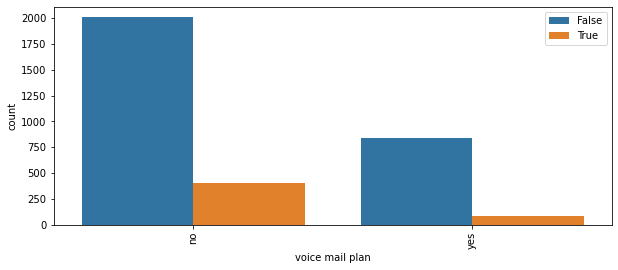

In [81]:
plot_categorical_distribution(df, 'voice mail plan')

Most of the customers who churned did not have an voicemail plan.

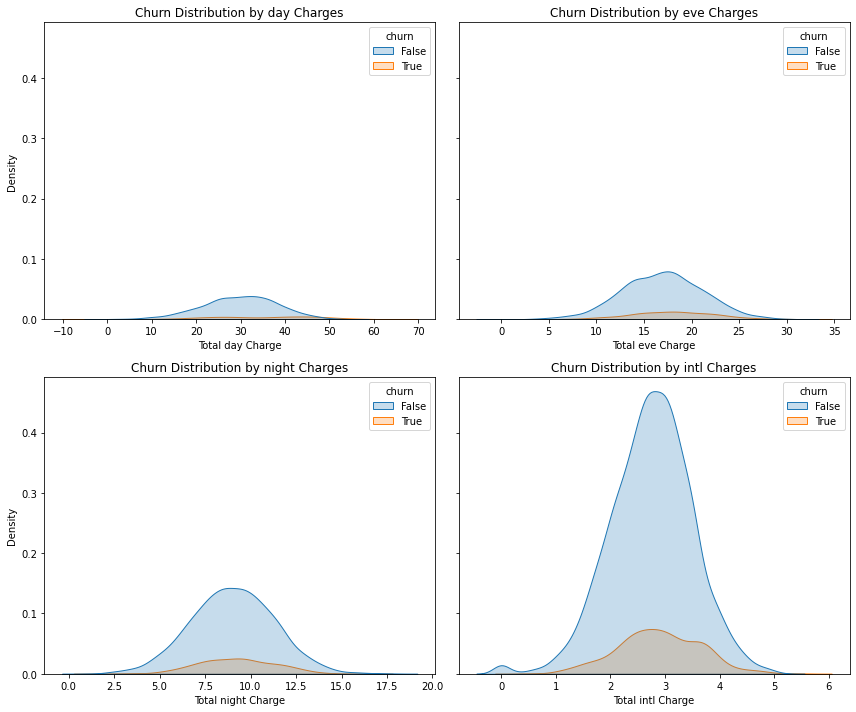

In [82]:
#Checking the distribution of numerical features based on churn rate
def plot_churn_kde(data, numeric_features):
    """
    A function to plot KDEs for multiple numeric features based on churn rate.
    """
    n_features = len(numeric_features)
    ncols = 2
    nrows = (n_features + 1) // ncols

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 5 * nrows), sharex=False, sharey=True)
    axes = axes.flatten()

    for i, feature in enumerate(numeric_features):
        sns.kdeplot(data=data, x=feature, hue='churn', fill=True, ax=axes[i])
        axes[i].set_xlabel(f'Total {feature.split()[1]} Charge')
        axes[i].set_ylabel('Density')
        axes[i].set_title(f'Churn Distribution by {feature.split()[1]} Charges')

    # Hide any unused subplots
    for j in range(len(numeric_features), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Plot KDEs for each numeric feature
plot_churn_kde(df, ['total day charge', 'total eve charge', 'total night charge', 'total intl charge'])

### 4. Feature Engineering

##### 4.1 Label Encoding

In [83]:
# Convert columns with 'yes' or 'no' to binary using LabelEncoder
label_encoder = LabelEncoder()
df['churn'] = label_encoder.fit_transform(df['churn'])

##### 4.2 One Hot Encoding

International Plan, Area code, State and Voice Mail Plan are categorical varibles and will need to be transformed.

In [84]:
# Transform categorical variables using one-hot encoding
# Change our "state", "area code","international plan" and "voice mail plan" over to dummies and drop the first variable
categoricals_features = ['international plan', 'voice mail plan', 'state', 'area code']

dummies = pd.get_dummies(df[categoricals_features], drop_first=True)

df_preprocessed = df.drop(categoricals_features, axis=1)

df_preprocessed = pd.concat([df_preprocessed, dummies], axis=1)

df_preprocessed.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,0,0,0,1,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,0,0,1,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,0,0,0,1,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,0,0,0,0,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,0,0,0,1,0


##### 4.3 Scaling the data

In [85]:
# Instantiate MinMaxScaler
scaler = MinMaxScaler()

# Function to apply scaling
def scaling(column_data):
    return scaler.fit_transform(column_data.values.reshape(-1, 1)).flatten()

# Apply scaling to each numeric column
numeric_columns = df_preprocessed.select_dtypes(include=[np.number]).columns
for column in numeric_columns:
    if column != 'churn':  # Assuming you don't want to scale the target variable
        df_preprocessed[column] = scaling(df_preprocessed[column])

# Print the scaled DataFrame
print(df_preprocessed.head())

   account length  number vmail messages  total day minutes  total day calls  \
0        0.524793               0.490196           0.755701         0.666667   
1        0.438017               0.509804           0.460661         0.745455   
2        0.561983               0.000000           0.693843         0.690909   
3        0.342975               0.000000           0.853478         0.430303   
4        0.305785               0.000000           0.475200         0.684848   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0          0.755701           0.542755         0.582353          0.542866   
1          0.460597           0.537531         0.605882          0.537690   
2          0.693830           0.333242         0.647059          0.333225   
3          0.853454           0.170195         0.517647          0.170171   
4          0.475184           0.407754         0.717647          0.407959   

   total night minutes  total night calls  ...  state_TX

##### 5. Modelling

In [86]:
X = df_preprocessed.drop('churn', axis=1)
y = df_preprocessed['churn']


#### 5.1 Train-Test Split

We split the  data into train and test sets using a test_size of 0.3

In [87]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to balance class distribution
from imblearn.over_sampling import SMOTE, SMOTENC
smote = SMOTENC(categorical_features=[0, 1], random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#### 5.2 Logistic Regression

In [88]:
#instantiate the logistic regression
logreg = LogisticRegression(random_state=42)

In [89]:
# Fit the model on the training data 
logreg.fit(X_train_resampled, y_train_resampled)
#predict on the labels of test set
y_pred_log = logreg.predict(X_test)

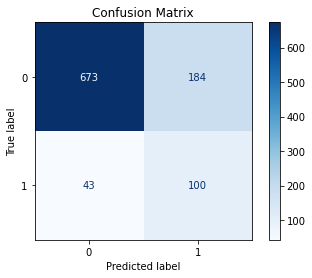

In [90]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Define the function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    """
    Plots a confusion matrix using scikit-learn's ConfusionMatrixDisplay.
    """
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Create a ConfusionMatrixDisplay object
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    
    # Plot the confusion matrix
    disp.plot(cmap='Blues', values_format='d')  # 'Blues' colormap is often used, 'Lightblue' is not available
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix')
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred_log, classes=[0, 1])

In [91]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86       857
           1       0.35      0.70      0.47       143

    accuracy                           0.77      1000
   macro avg       0.65      0.74      0.66      1000
weighted avg       0.86      0.77      0.80      1000



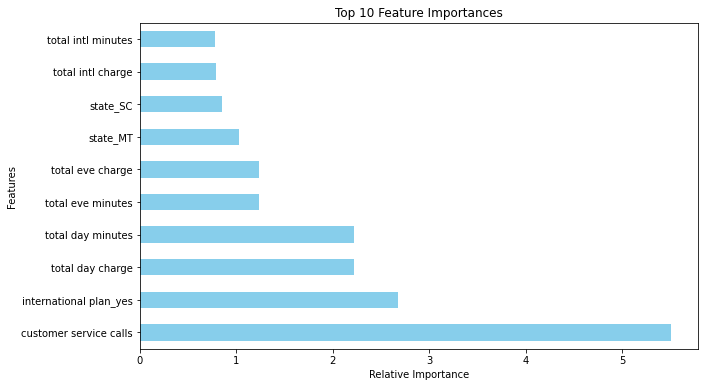

In [92]:
# Get feature importances from the logistic regression model
importance = logreg.coef_[0]
feature_names = X_train_resampled.columns

# Create a Series for feature importances and sort it
feature_importances = pd.Series(importance, index=feature_names).sort_values(ascending=False)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
feature_importances.head(10).plot(kind='barh', color='skyblue')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances')
plt.show()

The logistic regression model has a recall score of 0.70, which means that the model can identify around 70% of the actual positive instances correctly.

The confusion matrix evaluation showed that the model had a higher number of true positives and true negatives than false positives and false negatives. This indicates that the model correctly identifies churn and non-churn cases more often than it makes incorrect predictions. This is reflected in the higher counts of true positives and true negatives.

According to the model,`total day charge`, `international plan`and`customer service calls`, are the top three most important features.

#### 5.2 Decision Tree

In [93]:
#Instantiate DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)

In [94]:
#Fit on the training data
dt_clf.fit(X_train_resampled, y_train_resampled)

#predict on the test set
y_pred_dt = dt_clf.predict(X_test)

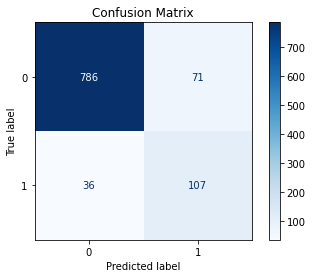

In [95]:
plot_confusion_matrix(y_test, y_pred_dt, [0,1])

In [96]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       857
           1       0.60      0.75      0.67       143

    accuracy                           0.89      1000
   macro avg       0.78      0.83      0.80      1000
weighted avg       0.91      0.89      0.90      1000



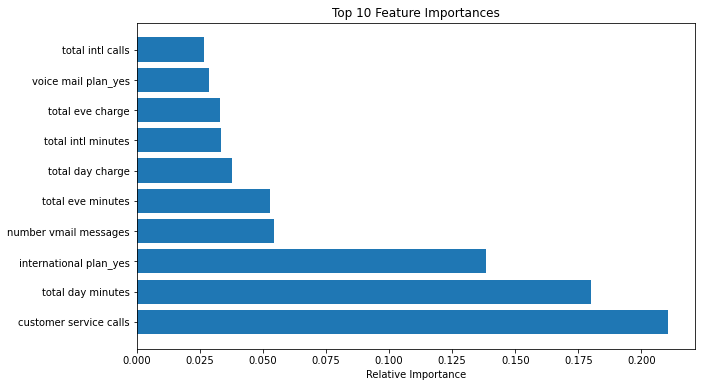

In [97]:
# Get feature importances from the decision tree classifier
importances = dt_clf.feature_importances_
feature_names = X_train_resampled.columns

# Sort the features by importance in descending order
indices = np.argsort(importances)[::-1]

# Select the top 10 features
top_indices = indices[:10]
top_importances = importances[top_indices]
top_feature_names = [feature_names[i] for i in top_indices]

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importances')
plt.barh(range(len(top_indices)), top_importances, align='center')
plt.yticks(range(len(top_indices)), top_feature_names)
plt.xlabel('Relative Importance')
plt.show()

The decision tree model has a recall score of 0.75, which is actually good but not better than our baseline model. This means that the model can identify around 75% of the actual positive instances correctly.

The confusion matrix evaluation showed that the model had a higher number of true positives and true negatives than false positives and false negatives. This indicates that the model correctly identifies churn and non-churn cases more often than it makes incorrect predictions. This is reflected in the higher counts of true positives and true negatives.
According to the model, `international plan`,`total day minutes`, `customer service calls`, are the top three most important features.

## 6. Model Evaluation

### 6.1 Models Comparison - Recall Score

The recall score is a measure of how many of the positive instances the model correctly identifies. A higher recall score indicates that the model is better at identifying positive instances. 

In [98]:
np.random.seed(42)

classifiers = [LogisticRegression(),
               DecisionTreeClassifier(),
]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'recall'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    
    recall = recall_score(y_test, y_pred)
    
    result_table = result_table.append({'classifiers': cls.__class__.__name__,
                                        'recall': recall}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

result_table

,recall
classifiers,
LogisticRegression,0.699301
DecisionTreeClassifier,0.748252


The recall score of Decision Tree Classifier is better than the one of Logistic regression.
The Decision Tree model correctly identifies approximately 74.8% of the actual churn cases. This suggests that the Decision Tree classifier has a better ability to detect churn compared to the Logistic Regression model.

### 6.2 Models Comparison - ROC Curves

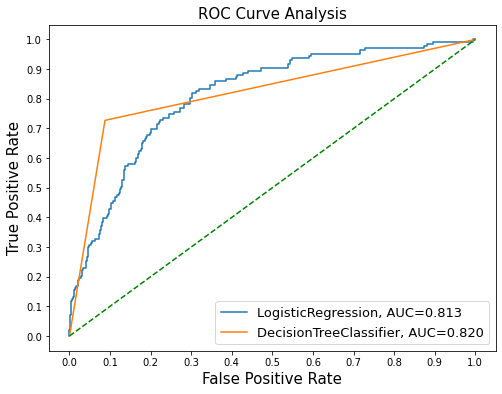

In [101]:
# Define classifiers
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier()
]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr', 'tpr', 'auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train_resampled, y_train_resampled)
    yproba = model.predict_proba(X_test)[:, 1]  # Get probability estimates for the positive class
    
    fpr, tpr, _ = roc_curve(y_test, yproba)
    auc = roc_auc_score(y_test, yproba)
    result_table = result_table.append({
        'classifiers': cls.__class__.__name__,
        'fpr': fpr, 
        'tpr': tpr, 
        'auc': auc
    }, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

# Plot ROC curves
plt.figure(figsize=(8, 6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontsize=15)
plt.legend(prop={'size': 13}, loc='lower right')

plt.show()

The ROC curve analysis indicates that the DecisionTreeClassifier outperforms the LogisticRegression model. The DecisionTreeClassifier achieved the highest AUC score of 0.82, surpassing the LogisticRegression, which obtained an AUC score of 0.813. A higher AUC score signifies that the classifier is more effective at differentiating between positive and negative instances.

## 7. Conclusion.
According to the visualizations, the following features are classified under important features hence they contribute more to customer churn;`international plan`,`total day minutes`, `customer service calls``total day charge`


 We achieved our objectives to be able to predict customer churn and had an acceptable recall score. 

### Recommendations 

* Offer discounts or promotional offers to customers in area code 415 and 510, as these areas have a higher churn rate. This can help incentivize customers to stay with the company.


* Improve customer service quality and reduce the number of customer service calls. Enhance training programs for customer service representatives to ensure prompt and effective resolution of customer issues, leading to higher customer satisfaction and reduced churn. 


* Evaluate the pricing structure for day, evening, night, and international charges. Consider adjusting pricing plans or introducing discounted packages to address the higher charges associated with customers who churn. 

